In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
from sklearn.preprocessing import PolynomialFeatures

#this line is needed for matplotlib to show the histplot after df.hist
%matplotlib inline


warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# setting views for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# reading csv
df = pd.read_csv("./Cleaned.csv")

In [3]:
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
df

,RW,LW,RE,LE,RS,LS,RH,LH,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,1
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,1
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,1
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,1
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,1
9,159.82,151.41,104.09,91.68,102.35,26.27,46.90,15.03,1


# Viewing pairplotting

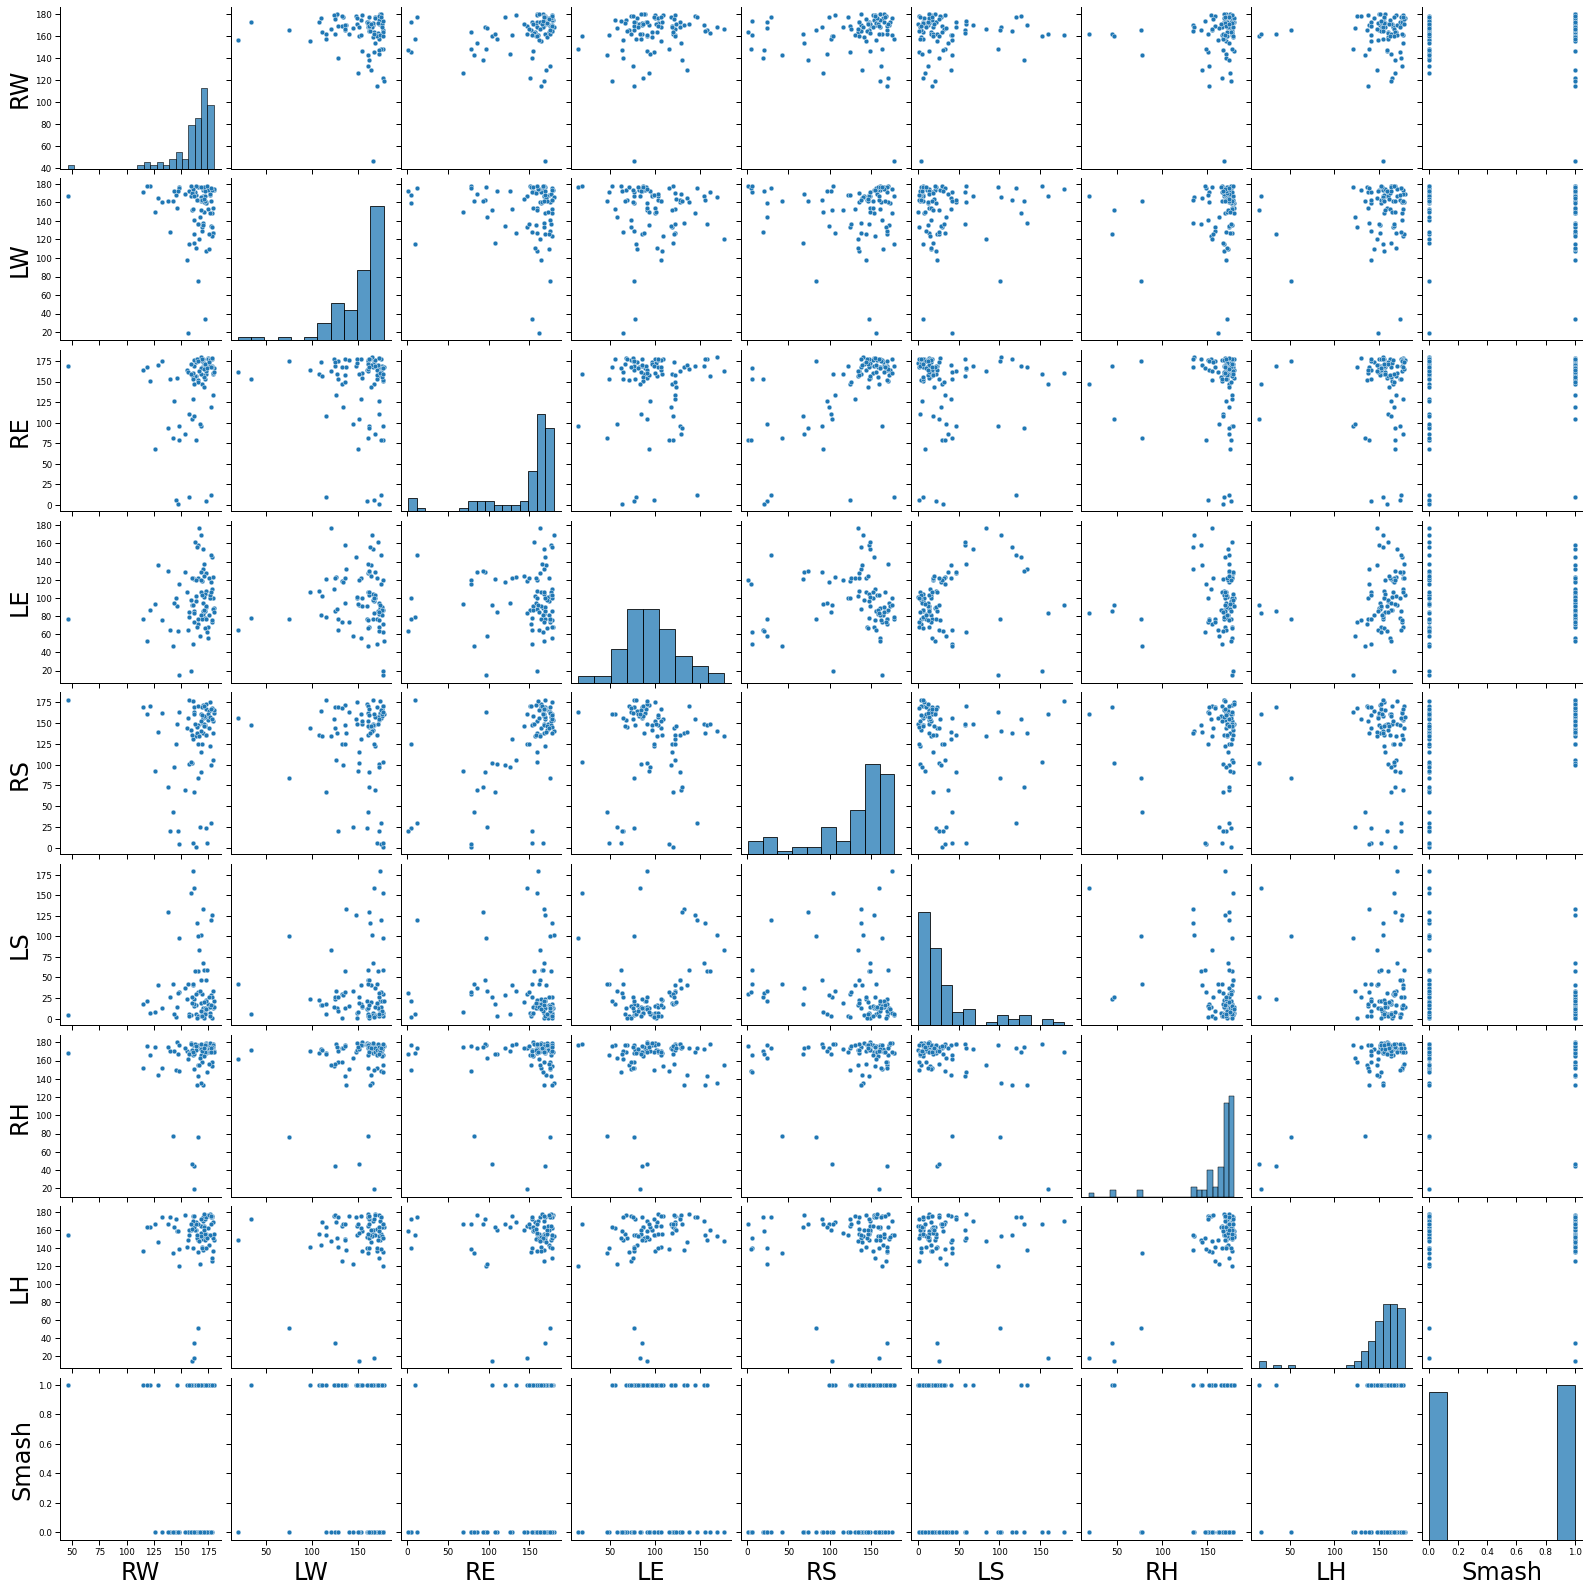

In [4]:
# looking ar pairplot to see of there are any interesting patterns
sns.set_context("paper", rc={"axes.labelsize":24})
sns.pairplot(df)

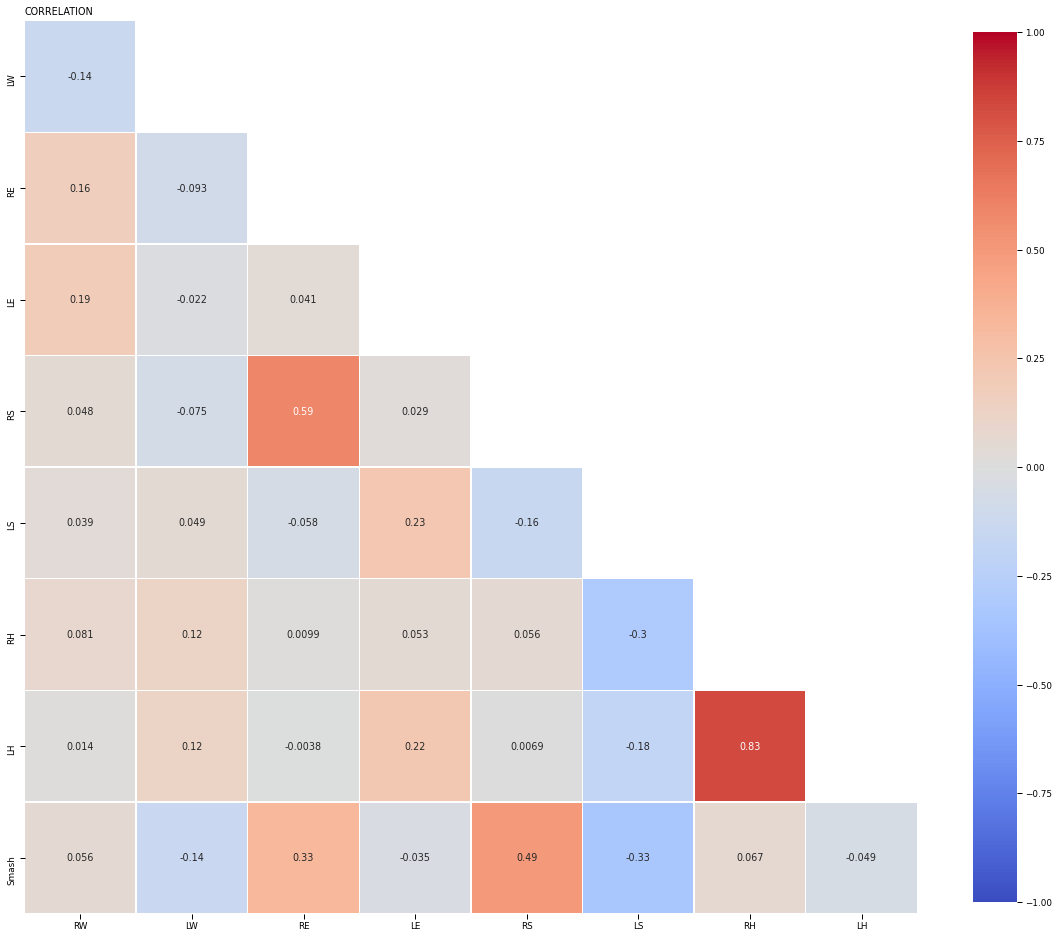

In [5]:
# viewing correlation between all features
df_corr = df.corr()
np.ones_like(df_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,20)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

# Feature Engineering

In [6]:
# using scikitlearn's polynomial features, let's see what we can get
features = ['RW', 'LW', 'RE', 'LE', 'RS', 'LS', 'RH', 'LH']
X = df[features]
# instantiating polynomial features
poly = PolynomialFeatures(include_bias = False)
X_poly = poly.fit_transform(X)# checking df
df_poly = pd.DataFrame(X_poly, columns = poly.get_feature_names(features))
df_poly

,RW,LW,RE,LE,RS,LS,RH,LH,RW^2,RW LW,RW RE,RW LE,RW RS,RW LS,RW RH,RW LH,LW^2,LW RE,LW LE,LW RS,LW LS,LW RH,LW LH,RE^2,RE LE,RE RS,RE LS,RE RH,RE LH,LE^2,LE RS,LE LS,LE RH,LE LH,RS^2,RS LS,RS RH,RS LH,LS^2,LS RH,LS LH,RH^2,RH LH,LH^2
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,32349.6196,31259.6680,29854.9614,16000.3456,29045.5914,3791.4488,30655.3384,26872.8826,30206.4400,28849.0620,15461.2480,28066.9620,3663.7040,29622.4720,25967.4580,27552.6801,14766.4704,26805.7251,3499.0692,28291.3356,24800.5659,7913.8816,14366.1504,1875.2768,15162.3424,13291.5136,26079.0201,3404.2092,27524.3556,24128.2209,444.3664,3592.8752,3149.5628,29049.7936,25465.4404,22323.3481
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,26253.7209,20315.3214,27365.2467,13813.0575,27443.0211,3802.8441,7158.4854,5583.5538,15720.1444,21175.4282,10688.6450,21235.6106,2942.6686,5539.2884,4320.5948,28523.8321,14397.8725,28604.8993,3963.8483,7461.5602,5819.9494,7267.5625,14438.7925,2000.8175,3766.3450,2937.7150,28686.1969,3975.1139,7482.7666,5836.4902,550.8409,1036.9046,808.7762,1951.8724,1522.4428,1187.4916
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,29884.0369,30513.2837,29151.0681,15641.2776,28765.5680,3782.3956,29730.1826,26321.1862,31155.7801,29764.8813,15970.6248,29371.2640,3862.0388,30356.1898,26875.4126,28436.0769,15257.6424,28060.0320,3689.6244,29000.9874,25675.6038,8186.6304,15055.8720,1979.7024,15560.7504,13776.4848,27688.9600,3640.8320,28617.4720,25336.0640,478.7344,3762.9224,3331.4488,29577.1204,26185.6748,23183.1076
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,28584.6649,22521.8147,24932.7529,20022.9601,21020.4731,5051.8116,29306.5938,27918.5291,17744.9041,19644.4787,15776.0603,16561.9993,3980.3148,23090.6214,21996.9673,21747.4009,17464.8721,18334.9451,4406.4036,25562.4498,24351.7211,14025.6649,14724.4019,3538.6884,20528.6562,19556.3459,15457.9489,3714.9804,21551.3622,20530.6129,892.8144,5179.3992,4934.0844,30046.7556,28623.6342,27267.9169
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,28821.8529,28288.7751,28590.9657,26166.6501,25322.8932,11440.8003,29290.4181,28905.0402,27765.5569,28062.1583,25682.6819,24854.5308,11229.1957,28748.6739,28370.4238,28361.9281,25957.0333,25120.0356,11349.1499,29055.7773,28673.4866,23756.0569,22990.0308,10386.8207,26592.0489,26242.1738,22248.7056,10051.8924,25734.5748,25395.9816,4541.4121,11626.7967,11473.8214,29766.6009,29374.9578,28988.4676
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,2104.0569,7645.1529,7755.2409,3502.6332,8171.7405,191.2779,7727.7189,7091.0433,27778.8889,28178.8969,12726.9212,29692.2605,695.0139,28078.8949,25765.5153,28584.6649,12910.1852,30119.8205,705.0219,28483.2229,26136.5313,5830.8496,13603.5340,318.4212,12864.3692,11804.4924,31737.4225,742.8855,30012.9305,27540.2085,17.3889,702.5199,644.6403,28382.1409,26043.7773,23898.0681
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,29804.5696,18560.5264,27475.6560,18529.4512,23422.0688,3924.1072,28987.9824,26864.5104,11558.4001,17110.2165,11539.0483,14585.8817,2443.7023,18052.0041,16729.6311,25328.7225,17081.5695,21591.8805,3617.4795,26722.8765,24765.3315,11519.7289,14561.4611,2439.6109,18021.7803,16701.6213,18406.3489,3083.7791,22780.3497,21111.6087,516.6529,3816.5943,3537.0153,28193.7681,26128.4751,24214.4721
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,32148.4900,22711.9310,23879.1740,21962.4570,18989.6630,6028.0660,31859.8170,30290.9420,16045.2889,16869.9106,15515.8083,13415.6197,4258.6454,22507.9923,21399.6298,17736.9124,16313.2182,14105.0938,4477.5116,23664.7542,22499.4292,15003.8001,12972.9159,4118.1138,21765.2481,20693.4606,11216.9281,3560.6942,18819.1479,17892.4354,1130.3044,5973.9378,5679.7628,31573.7361,30018.9486,28540.7236
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,29090.7136,29544.4032,28555.1552,13963.7472,27078.1056,1975.0848,29077.0688,26256.0064,30005.1684,29000.4924,14181.5214,27500.4072,2005.8876,29530.5456,26665.4868,28029.4564,13706.6754,26579.

In [7]:
df_poly.shape

(90, 44)

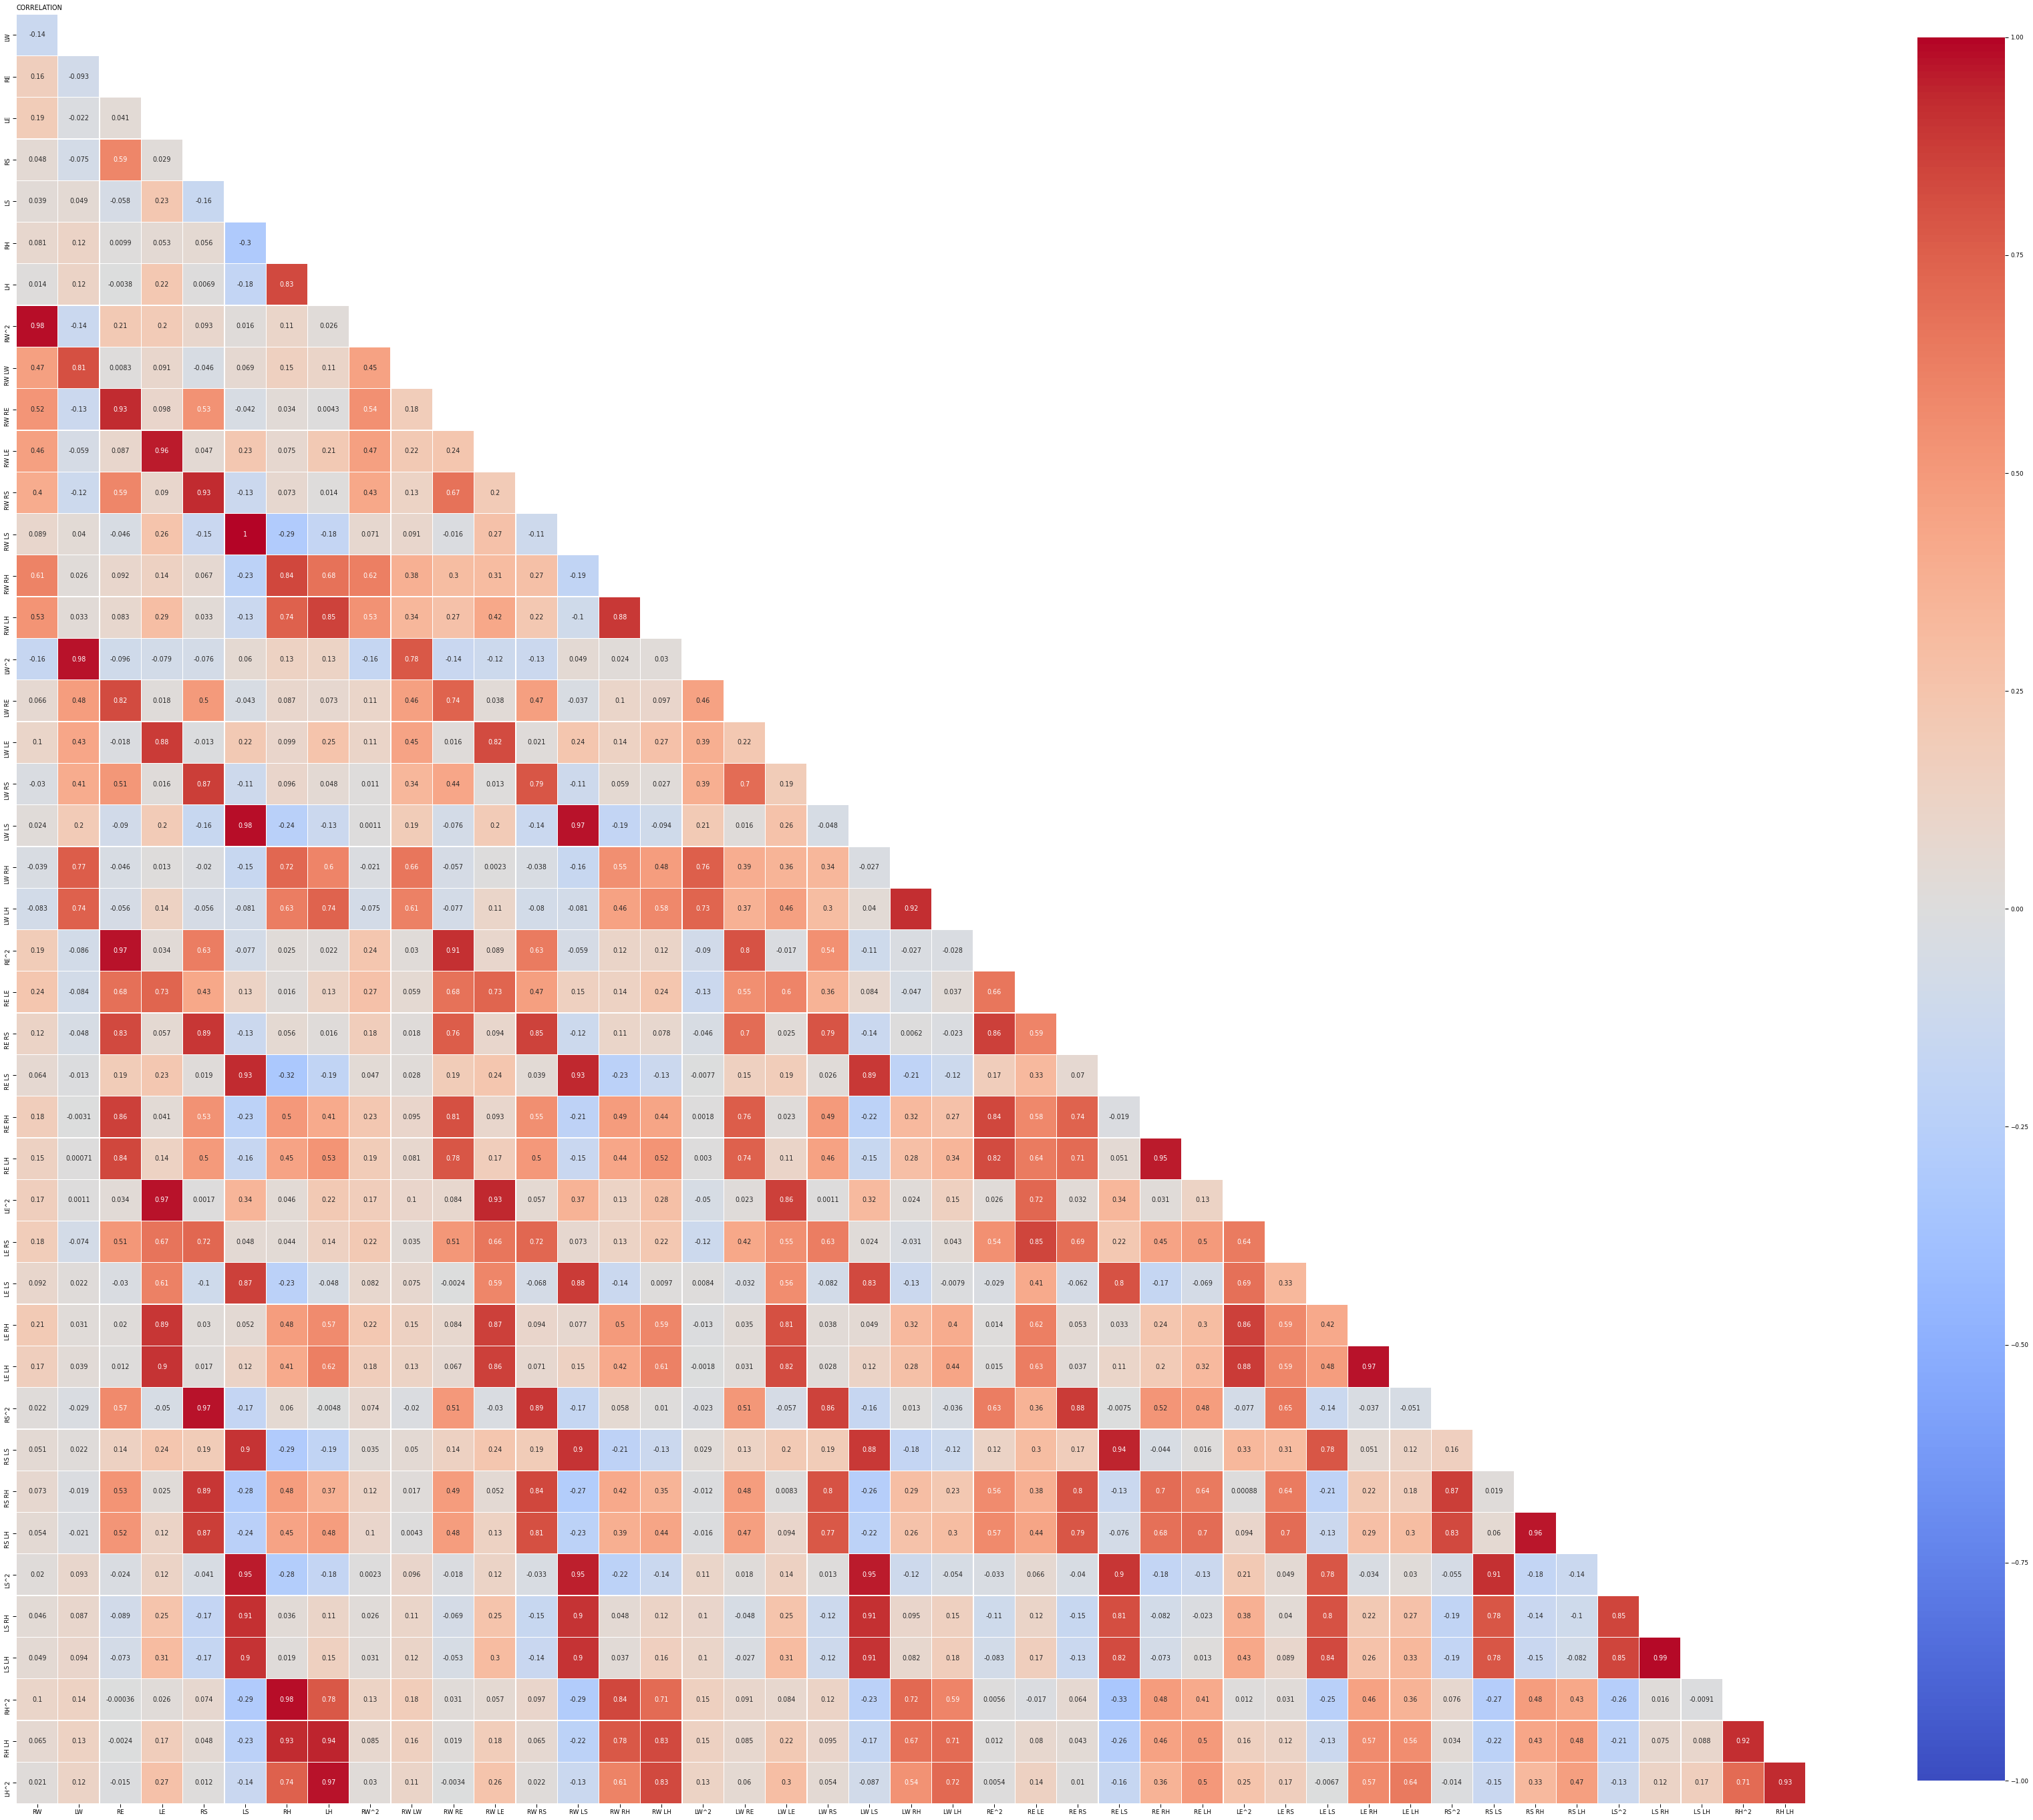

In [8]:
# viewing correlation between all features
df_poly_corr = df_poly.corr()
np.ones_like(df_poly_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df_poly_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_poly_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(60,60)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

In [9]:
# splitting df, too big to see. Need to reduce to see what's going on?
df1 = df_poly.iloc[: , 0:19]
df2 = df_poly.iloc[: , 20:39]
df3 = df_poly.iloc[: , 40:59]

In [10]:
# inputting curve into dfs
df1['Smash'] = df['Smash']
df2['Smash'] = df['Smash']
df3['Smash'] = df['Smash']
# Not ideal, but it will work

<ipython-input-10-49cde0393e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Smash'] = df['Smash']
<ipython-input-10-49cde0393e2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Smash'] = df['Smash']
<ipython-input-10-49cde0393e2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [11]:
df1

,RW,LW,RE,LE,RS,LS,RH,LH,RW^2,RW LW,RW RE,RW LE,RW RS,RW LS,RW RH,RW LH,LW^2,LW RE,LW LE,Smash
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,32349.6196,31259.6680,29854.9614,16000.3456,29045.5914,3791.4488,30655.3384,26872.8826,30206.4400,28849.0620,15461.2480,1
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,26253.7209,20315.3214,27365.2467,13813.0575,27443.0211,3802.8441,7158.4854,5583.5538,15720.1444,21175.4282,10688.6450,1
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,29884.0369,30513.2837,29151.0681,15641.2776,28765.5680,3782.3956,29730.1826,26321.1862,31155.7801,29764.8813,15970.6248,1
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,28584.6649,22521.8147,24932.7529,20022.9601,21020.4731,5051.8116,29306.5938,27918.5291,17744.9041,19644.4787,15776.0603,1
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,28821.8529,28288.7751,28590.9657,26166.6501,25322.8932,11440.8003,29290.4181,28905.0402,27765.5569,28062.1583,25682.6819,1
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,2104.0569,7645.1529,7755.2409,3502.6332,8171.7405,191.2779,7727.7189,7091.0433,27778.8889,28178.8969,12726.9212,1
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,29804.5696,18560.5264,27475.6560,18529.4512,23422.0688,3924.1072,28987.9824,26864.5104,11558.4001,17110.2165,11539.0483,1
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,32148.4900,22711.9310,23879.1740,21962.4570,18989.6630,6028.0660,31859.8170,30290.9420,16045.2889,16869.9106,15515.8083,1
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,29090.7136,29544.4032,28555.1552,13963.7472,27078.1056,1975.0848,29077.0688,26256.0064,30005.1684,29000.4924,14181.5214,1
9,159.82,151.41,104.09,91.68,102.35,26.27,46.90,15.03,25542.4324,24198.3462,16635.6638,14652.2976,16357.5770,4198.4714,7495.5580,2402.0946,22924.9881,15760.2669,13881.2688,1


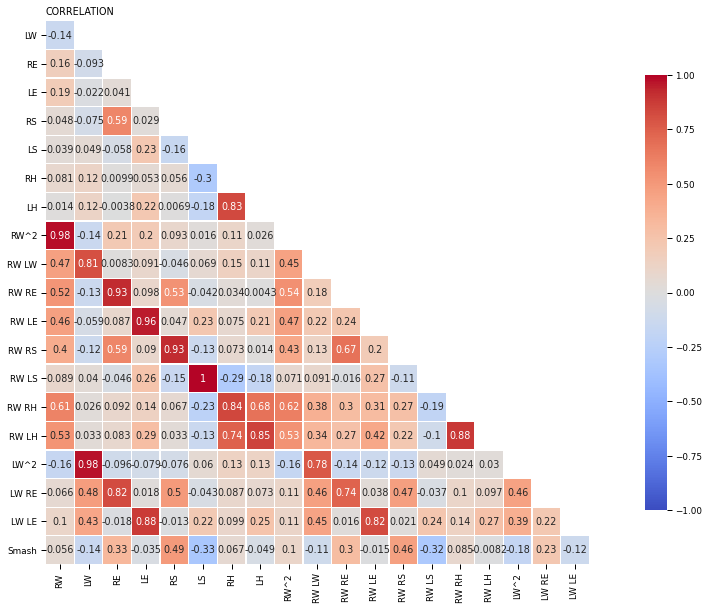

In [12]:
# viewing correlation between all features
df1_corr = df1.corr()
np.ones_like(df1_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df1_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df1_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,10)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

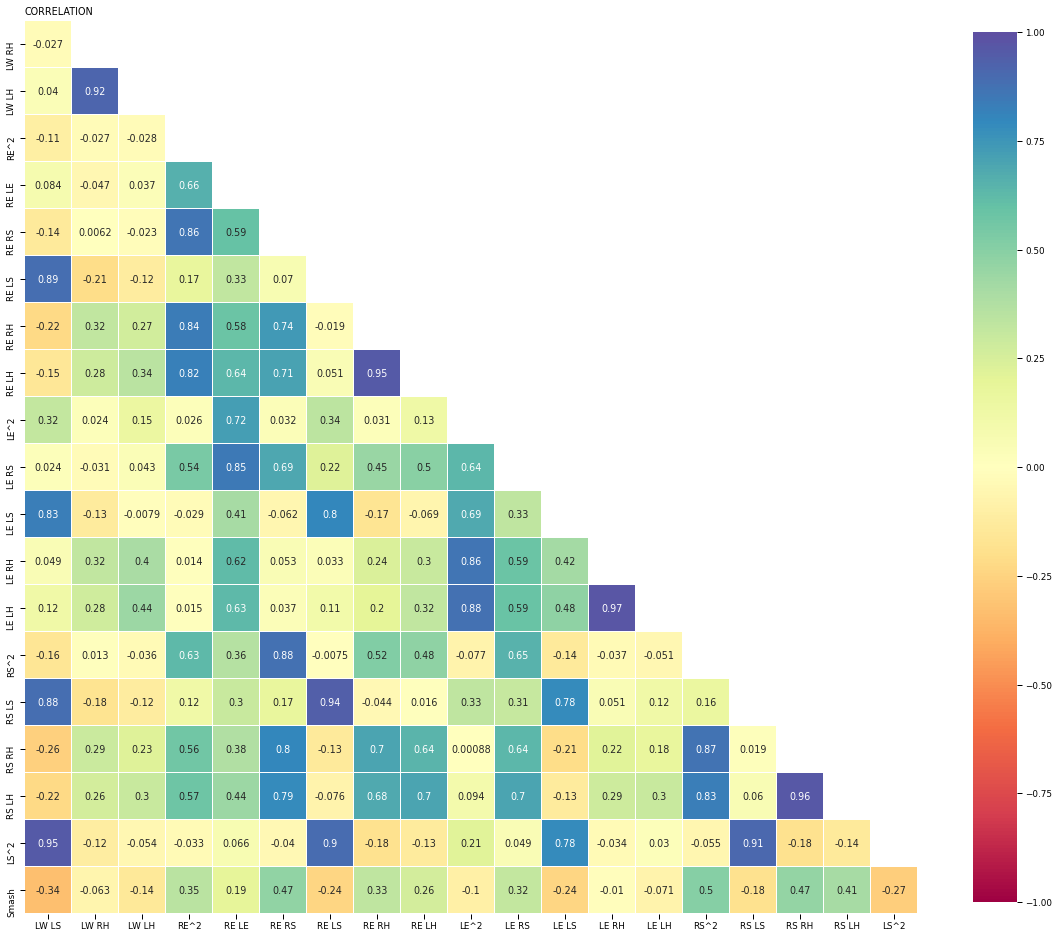

In [13]:
# viewing correlation between all features
df2_corr = df2.corr()
np.ones_like(df2_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df2_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df2_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,20)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='Spectral');

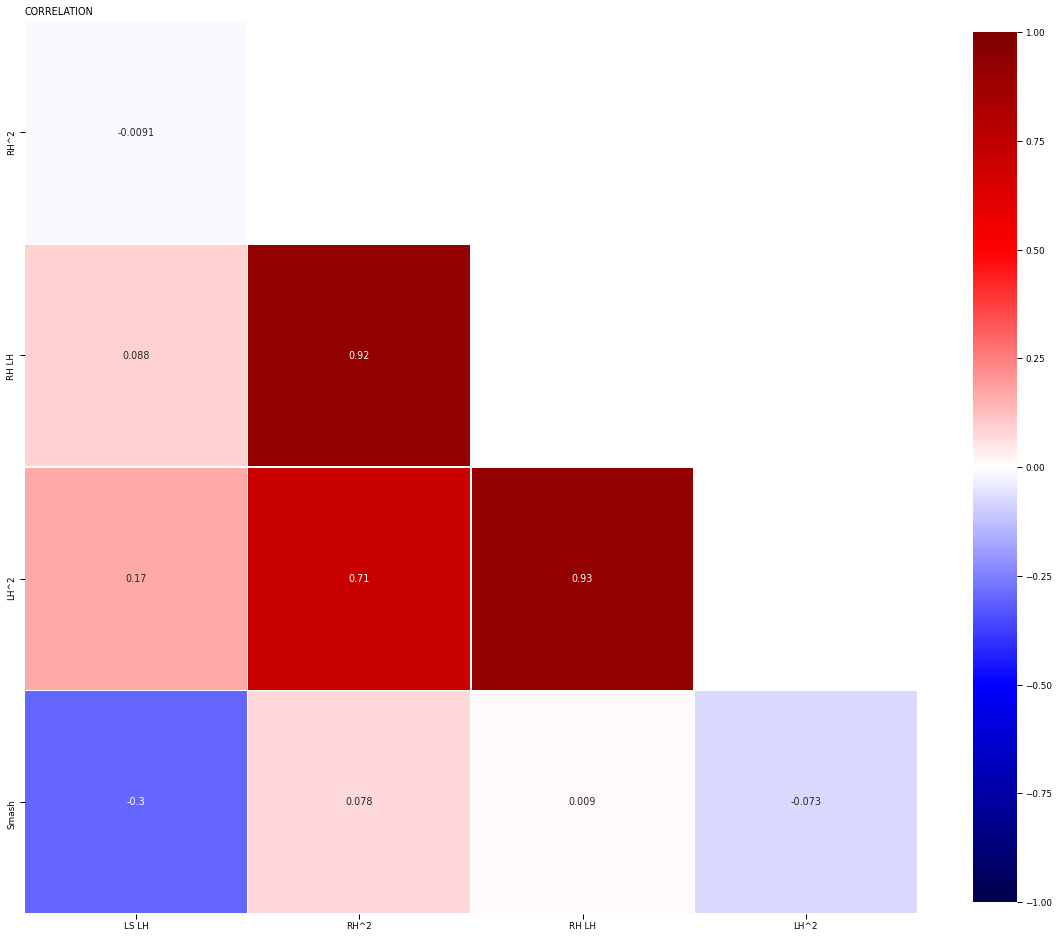

In [14]:
# viewing correlation between all features
df3_corr = df3.corr()
np.ones_like(df3_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df3_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df3_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,20)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='seismic');

In [15]:
df1.columns

Index(['RW', 'LW', 'RE', 'LE', 'RS', 'LS', 'RH', 'LH', 'RW^2', 'RW LW', 'RW RE', 'RW LE', 'RW RS', 'RW LS', 'RW RH', 'RW LH', 'LW^2', 'LW RE', 'LW LE', 'Smash'], dtype='object')

## Seems like polynomial features don't have much difference in impacting the classification results. Only Squared Values might have an impact, but otherwise, nothing much about it
But I think, I will not drop and see how it works out

In [16]:
df_poly

,RW,LW,RE,LE,RS,LS,RH,LH,RW^2,RW LW,RW RE,RW LE,RW RS,RW LS,RW RH,RW LH,LW^2,LW RE,LW LE,LW RS,LW LS,LW RH,LW LH,RE^2,RE LE,RE RS,RE LS,RE RH,RE LH,LE^2,LE RS,LE LS,LE RH,LE LH,RS^2,RS LS,RS RH,RS LH,LS^2,LS RH,LS LH,RH^2,RH LH,LH^2
0,179.86,173.80,165.99,88.96,161.49,21.08,170.44,149.41,32349.6196,31259.6680,29854.9614,16000.3456,29045.5914,3791.4488,30655.3384,26872.8826,30206.4400,28849.0620,15461.2480,28066.9620,3663.7040,29622.4720,25967.4580,27552.6801,14766.4704,26805.7251,3499.0692,28291.3356,24800.5659,7913.8816,14366.1504,1875.2768,15162.3424,13291.5136,26079.0201,3404.2092,27524.3556,24128.2209,444.3664,3592.8752,3149.5628,29049.7936,25465.4404,22323.3481
1,162.03,125.38,168.89,85.25,169.37,23.47,44.18,34.46,26253.7209,20315.3214,27365.2467,13813.0575,27443.0211,3802.8441,7158.4854,5583.5538,15720.1444,21175.4282,10688.6450,21235.6106,2942.6686,5539.2884,4320.5948,28523.8321,14397.8725,28604.8993,3963.8483,7461.5602,5819.9494,7267.5625,14438.7925,2000.8175,3766.3450,2937.7150,28686.1969,3975.1139,7482.7666,5836.4902,550.8409,1036.9046,808.7762,1951.8724,1522.4428,1187.4916
2,172.87,176.51,168.63,90.48,166.40,21.88,171.98,152.26,29884.0369,30513.2837,29151.0681,15641.2776,28765.5680,3782.3956,29730.1826,26321.1862,31155.7801,29764.8813,15970.6248,29371.2640,3862.0388,30356.1898,26875.4126,28436.0769,15257.6424,28060.0320,3689.6244,29000.9874,25675.6038,8186.6304,15055.8720,1979.7024,15560.7504,13776.4848,27688.9600,3640.8320,28617.4720,25336.0640,478.7344,3762.9224,3331.4488,29577.1204,26185.6748,23183.1076
3,169.07,133.21,147.47,118.43,124.33,29.88,173.34,165.13,28584.6649,22521.8147,24932.7529,20022.9601,21020.4731,5051.8116,29306.5938,27918.5291,17744.9041,19644.4787,15776.0603,16561.9993,3980.3148,23090.6214,21996.9673,21747.4009,17464.8721,18334.9451,4406.4036,25562.4498,24351.7211,14025.6649,14724.4019,3538.6884,20528.6562,19556.3459,15457.9489,3714.9804,21551.3622,20530.6129,892.8144,5179.3992,4934.0844,30046.7556,28623.6342,27267.9169
4,169.77,166.63,168.41,154.13,149.16,67.39,172.53,170.26,28821.8529,28288.7751,28590.9657,26166.6501,25322.8932,11440.8003,29290.4181,28905.0402,27765.5569,28062.1583,25682.6819,24854.5308,11229.1957,28748.6739,28370.4238,28361.9281,25957.0333,25120.0356,11349.1499,29055.7773,28673.4866,23756.0569,22990.0308,10386.8207,26592.0489,26242.1738,22248.7056,10051.8924,25734.5748,25395.9816,4541.4121,11626.7967,11473.8214,29766.6009,29374.9578,28988.4676
5,45.87,166.67,169.07,76.36,178.15,4.17,168.47,154.59,2104.0569,7645.1529,7755.2409,3502.6332,8171.7405,191.2779,7727.7189,7091.0433,27778.8889,28178.8969,12726.9212,29692.2605,695.0139,28078.8949,25765.5153,28584.6649,12910.1852,30119.8205,705.0219,28483.2229,26136.5313,5830.8496,13603.5340,318.4212,12864.3692,11804.4924,31737.4225,742.8855,30012.9305,27540.2085,17.3889,702.5199,644.6403,28382.1409,26043.7773,23898.0681
6,172.64,107.51,159.15,107.33,135.67,22.73,167.91,155.61,29804.5696,18560.5264,27475.6560,18529.4512,23422.0688,3924.1072,28987.9824,26864.5104,11558.4001,17110.2165,11539.0483,14585.8817,2443.7023,18052.0041,16729.6311,25328.7225,17081.5695,21591.8805,3617.4795,26722.8765,24765.3315,11519.7289,14561.4611,2439.6109,18021.7803,16701.6213,18406.3489,3083.7791,22780.3497,21111.6087,516.6529,3816.5943,3537.0153,28193.7681,26128.4751,24214.4721
7,179.30,126.67,133.18,122.49,105.91,33.62,177.69,168.94,32148.4900,22711.9310,23879.1740,21962.4570,18989.6630,6028.0660,31859.8170,30290.9420,16045.2889,16869.9106,15515.8083,13415.6197,4258.6454,22507.9923,21399.6298,17736.9124,16313.2182,14105.0938,4477.5116,23664.7542,22499.4292,15003.8001,12972.9159,4118.1138,21765.2481,20693.4606,11216.9281,3560.6942,18819.1479,17892.4354,1130.3044,5973.9378,5679.7628,31573.7361,30018.9486,28540.7236
8,170.56,173.22,167.42,81.87,158.76,11.58,170.48,153.94,29090.7136,29544.4032,28555.1552,13963.7472,27078.1056,1975.0848,29077.0688,26256.0064,30005.1684,29000.4924,14181.5214,27500.4072,2005.8876,29530.5456,26665.4868,28029.4564,13706.6754,26579.

In [17]:
df_poly['Smash'] = df['Smash'].copy()

In [18]:
df_poly.columns

Index(['RW', 'LW', 'RE', 'LE', 'RS', 'LS', 'RH', 'LH', 'RW^2', 'RW LW', 'RW RE', 'RW LE', 'RW RS', 'RW LS', 'RW RH', 'RW LH', 'LW^2', 'LW RE', 'LW LE', 'LW RS', 'LW LS', 'LW RH', 'LW LH', 'RE^2', 'RE LE', 'RE RS', 'RE LS', 'RE RH', 'RE LH', 'LE^2', 'LE RS', 'LE LS', 'LE RH', 'LE LH', 'RS^2', 'RS LS', 'RS RH', 'RS LH', 'LS^2', 'LS RH', 'LS LH', 'RH^2', 'RH LH', 'LH^2', 'Smash'], dtype='object')

In [19]:
# exporting df as csv
df_poly.to_csv("./final.csv")